# Data import and preparation

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns

# pd.set_option("display.precision", 2)

injury_dataset = pd.read_csv('injury_data.csv')

# injury_dataset['Training_Intensity_Percentage'] = injury_dataset['Training_Intensity'] * 100
# training_intensity_index = injury_dataset.columns.get_loc('Training_Intensity')
# injury_dataset.pop('Training_Intensity')
# injury_dataset.insert(training_intensity_index + 1, 'Training_Intensity', injury_dataset.pop('Training_Intensity_Percentage'))
# injury_dataset['Training_Intensity'] = injury_dataset['Training_Intensity'].map('{:.2f}%'.format)

injury_dataset.head()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
0,24,66.251933,175.732429,1,0.457929,5,0
1,37,70.996271,174.581650,0,0.226522,6,1
2,32,80.093781,186.329618,0,0.613970,2,1
3,28,87.473271,175.504240,1,0.252858,4,1
4,25,84.659220,190.175012,0,0.577632,1,1


# Statistics on the dataset

In [2]:
injury_dataset.describe()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,28.231000,74.794351,179.750948,0.515000,0.490538,3.466000,0.50000
std,6.538378,9.892621,9.888921,0.500025,0.286184,1.701099,0.50025
min,18.000000,40.191912,145.285701,0.000000,0.000031,1.000000,0.00000
25%,22.000000,67.944028,173.036976,0.000000,0.241042,2.000000,0.00000
50%,28.000000,75.020569,180.034436,1.000000,0.483912,4.000000,0.50000
75%,34.000000,81.302956,186.557913,1.000000,0.730404,5.000000,1.00000
max,39.000000,104.650104,207.308672,1.000000,0.997749,6.000000,1.00000


In [3]:
injury_dataset['Likelihood_of_Injury'].value_counts()

Likelihood_of_Injury
0    500
1    500
Name: count, dtype: int64

In [4]:
injury_dataset.groupby('Likelihood_of_Injury').corr()

Player_Age  Player_Weight  \
Likelihood_of_Injury                                                 
0                    Player_Age            1.000000      -0.047520   
                     Player_Weight        -0.047520       1.000000   
                     Player_Height         0.028468      -0.010951   
                     Previous_Injuries    -0.059560       0.112436   
                     Training_Intensity    0.010869       0.066595   
                     Recovery_Time        -0.029567      -0.105020   
1                    Player_Age            1.000000      -0.032950   
                     Player_Weight        -0.032950       1.000000   
                     Player_Height         0.063286       0.074139   
                     Previous_Injuries    -0.031207      -0.042775   
                     Training_Intensity    0.073294       0.022206   
                     Recovery_Time        -0.045779      -0.016064   

                                         Player_Height  Previous_Injuries  \
Likelihood_of_Injury                                                        
0                    Player_Age               0.028468          -0.059560   
                     Player_Weight           -0.010951           0.112436   
                     Player_Height            1.000000           0.034986   
                     Previous_Injuries        0.034986           1.000000   
                     Training_Intensity       0.052716           0.000910   
                     Recovery_Time            0.022724          -0.037150   
1                    Player_Age               0.063286          -0.031207   
                     Player_Weight            0.074139          -0.042775   
                     Player_Height            1.000000          -0.022450   
                     Previous_Injuries       -0.022450           1.000000   
                     Training_Intensity       0.038271          -0.051246   
                     Recovery_Time            0.037279           0.027570   

                                         Training_Intensity  Recovery_Time  
Likelihood_of_Injury                                                        
0                    Player_Age                    0.010869      -0.029567  
                     Player_Weight                 0.066595      -0.105020  
                     Player_Height                 0.052716       0.022724  
                     Previous_Injuries             0.000910      -0.037150  
                     Training_Intensity            1.000000      -0.019078  
                     Recovery_Time                -0.019078       1.000000  
1                    Player_Age                    0.073294      -0.045779  
                     Player_Weight                 0.022206      -0.016064  
                     Player_Height                 0.038271       0.037279  
                     Previous_Injuries            -0.051246       0.027570  
                     Training_Intensity            1.000000      -0.057007  
                     Recovery_Time                -0.057007       1.000000

## Standard Deviation Plots

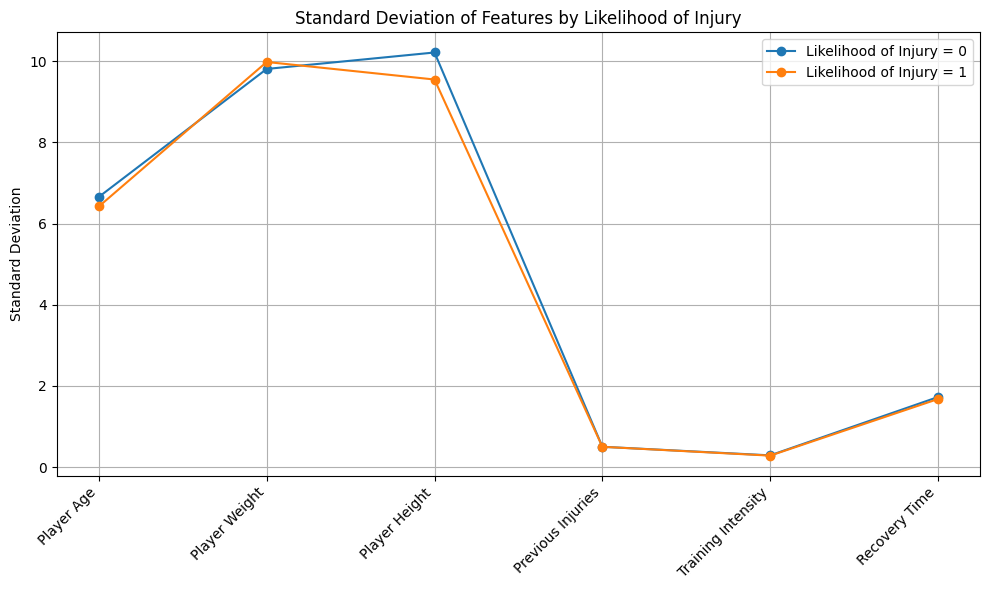

In [5]:
# Group by 'Likelihood_of_Injury' and calculate the standard deviation for each feature
standard_deviations = injury_dataset.groupby('Likelihood_of_Injury').std()

# Plot the standard deviations as line graphs
features = standard_deviations.columns
likelihoods = standard_deviations.index

fig, ax = plt.subplots(figsize=(10, 6))
for likelihood in likelihoods:
    ax.plot(features.str.replace('_', ' '), standard_deviations.loc[likelihood], marker='o', label=f'Likelihood of Injury = {likelihood}')

ax.set_title('Standard Deviation of Features by Likelihood of Injury')
ax.set_ylabel('Standard Deviation')
ax.legend()
ax.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Data Distribution Plots

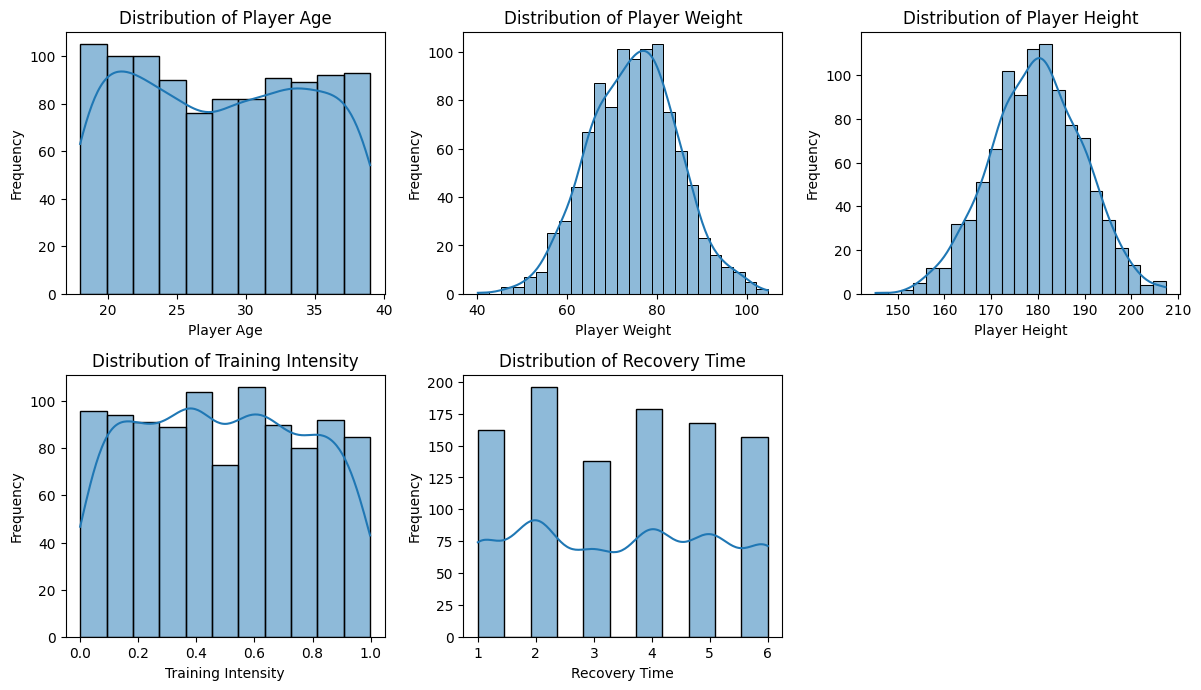

In [6]:
# Select columns excluding Likelihood_of_Injury
features_to_plot = injury_dataset.drop(columns=['Likelihood_of_Injury','Previous_Injuries']).columns

plt.figure(figsize=(12, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(injury_dataset[feature], kde=True)
    plt.title(f'Distribution of {feature.replace('_',' ')}')
    plt.xlabel(feature.replace('_',' '))
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Applying regression to the dataset

## Creating a logistic regression model

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Separate features (X) and target variable (y)
X = injury_dataset.drop('Likelihood_of_Injury', axis=1)
y = injury_dataset['Likelihood_of_Injury']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Likely To Be Injured', 'Likely To Be Injured']))

cm = confusion_matrix(y_test, y_pred)
TP, FN, FP, TN = cm.ravel()

print("Confusion Matrix:")
print(f"TP: {TP}, FN: {FN}, FP: {FP}, TN: {TN}")

Classification Report:
                          precision    recall  f1-score   support

Not Likely To Be Injured       0.51      0.63      0.57       145
    Likely To Be Injured       0.56      0.45      0.50       155

                accuracy                           0.53       300
               macro avg       0.54      0.54      0.53       300
            weighted avg       0.54      0.53      0.53       300

Confusion Matrix:
TP: 91, FN: 54, FP: 86, TN: 69


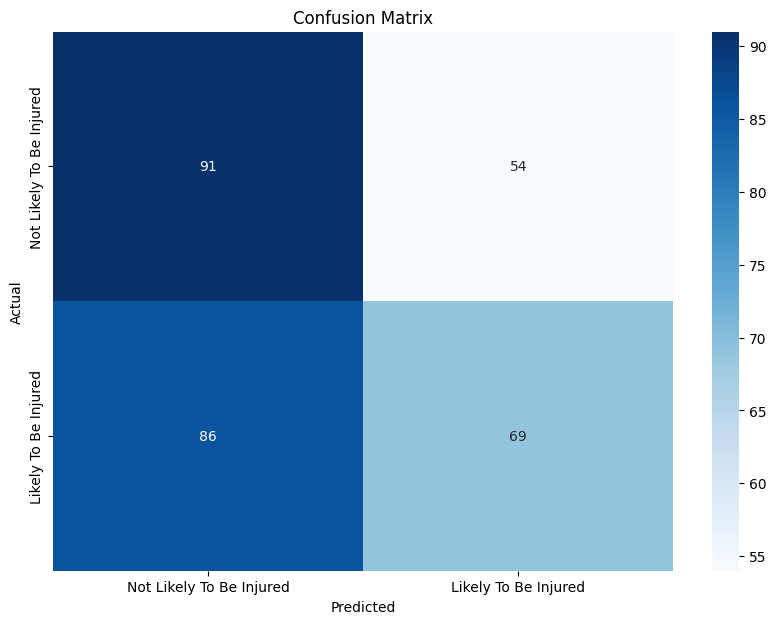

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom target names
target_names = ['Not Likely To Be Injured', 'Likely To Be Injured']

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Attempting to improve the model

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix

# Separate features (X) and target variable (y)
X = injury_dataset.drop('Likelihood_of_Injury', axis=1)
y = injury_dataset['Likelihood_of_Injury']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Resampling to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Pipeline for preprocessing and model
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, interaction_only=True)),  # Adding polynomial features
    ('scaler', StandardScaler()),  # Feature scaling
    ('model', RandomForestClassifier())  # Random Forest model
])

# Hyperparameter tuning
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_res, y_train_res)

# Best model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Likely To Be Injured', 'Likely To Be Injured']))

cm = confusion_matrix(y_test, y_pred)
TP, FN, FP, TN = cm.ravel()

print("Confusion Matrix:")
print(f"TP: {TP}, FN: {FN}, FP: {FP}, TN: {TN}")

Classification Report:
                          precision    recall  f1-score   support

Not Likely To Be Injured       0.55      0.52      0.53       145
    Likely To Be Injured       0.57      0.60      0.58       155

                accuracy                           0.56       300
               macro avg       0.56      0.56      0.56       300
            weighted avg       0.56      0.56      0.56       300

Confusion Matrix:
TP: 75, FN: 70, FP: 62, TN: 93


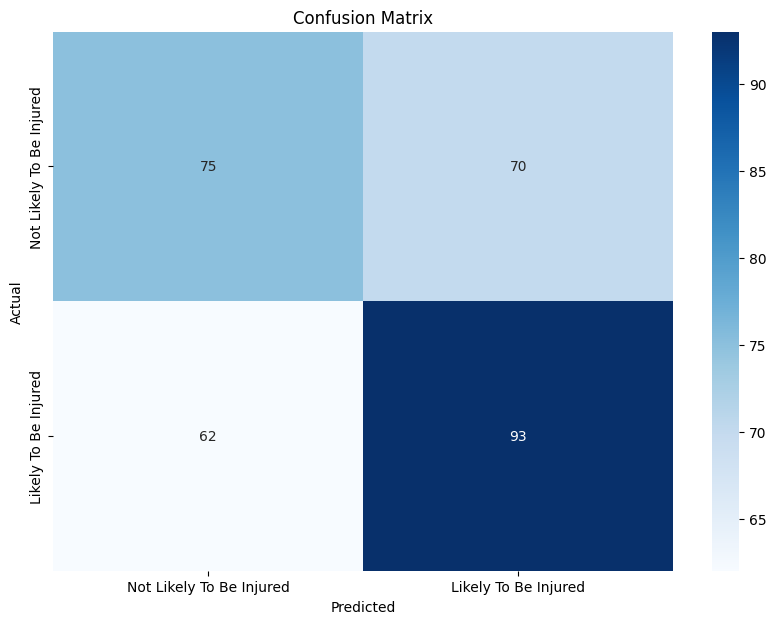

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom target names
target_names = ['Not Likely To Be Injured', 'Likely To Be Injured']

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()